In [239]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [240]:
data1 = pd.read_excel("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/canopy cover.xlsx")
data1

,Day,Date,CC
0,0 2019,2019-03-26,0.00020
1,13,2019-04-07,0.02500
2,25,2019-04-19,1.30000
3,35,2019-04-29,17.32000
4,41,2019-05-05,35.63000
5,49,2019-05-13,50.14000
6,55,2019-05-19,58.85000
7,62,2019-05-26,67.48000
8,69,2019-06-02,75.48000
9,77,2019-06-10,84.80000


In [241]:
data1 = data1.iloc[30:45]

In [242]:
data2 = data1.drop(['Day'], axis=1)
data2

,Date,CC
30,2021-03-26,0.0032
31,2021-04-07,0.2300
32,2021-04-19,8.9900
33,2021-04-29,14.4900
34,2021-05-05,22.6300
35,2021-05-13,40.4300
36,2021-05-19,56.0900
37,2021-05-26,68.2000
38,2021-06-02,79.8200
39,2021-06-10,84.8300


In [243]:
data0 = data2.copy()
data0['Date'] = pd.to_datetime(data0['Date'])
data0.index = data0['Date']
del data0['Date']

In [244]:
df_interpol = data0.resample('D').mean()
df_interpol['CC'] = df_interpol['CC'].interpolate()
df_interpol

,CC
Date,
2021-03-26,0.0032
2021-03-27,0.0221
2021-03-28,0.0410
2021-03-29,0.0599
2021-03-30,0.0788
...,...
2021-07-15,92.3780
2021-07-16,92.9260
2021-07-17,93.4740


In [245]:
df_interpol.to_csv('CC_2021.csv')

In [287]:
f0 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CC_2019.csv")
f1 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CC_2020.csv")
f2 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CC_2021.csv")

In [288]:
f3 = f0.append(f1)
f4 = f3.append(f2)
print (f4)

           Date         CC
0    2019-03-26   0.000200
1    2019-03-27   0.002267
2    2019-03-28   0.004333
3    2019-03-29   0.006400
4    2019-03-30   0.008467
..          ...        ...
111  2021-07-15  92.378000
112  2021-07-16  92.926000
113  2021-07-17  93.474000
114  2021-07-18  94.022000
115  2021-07-19  94.570000

[348 rows x 2 columns]


C:\Users\samba\AppData\Local\Temp\ipykernel_24108\1467872578.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f3 = f0.append(f1)
C:\Users\samba\AppData\Local\Temp\ipykernel_24108\1467872578.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f4 = f3.append(f2)


In [289]:
f4.to_csv('final_dataset_sarima_cc.csv')

In [290]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [291]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [292]:
f4

,Date,CC
0,2019-03-26,0.000200
1,2019-03-27,0.002267
2,2019-03-28,0.004333
3,2019-03-29,0.006400
4,2019-03-30,0.008467
...,...,...
111,2021-07-15,92.378000
112,2021-07-16,92.926000
113,2021-07-17,93.474000
114,2021-07-18,94.022000


In [293]:
data2 = f4.copy()

In [296]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [297]:
data2.drop(['Date'], axis = 1,inplace = True)

In [298]:
min(data2['CC'])

0.0002

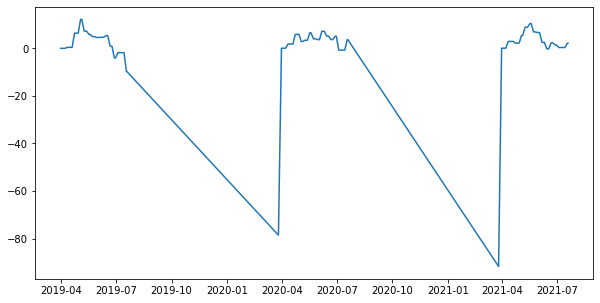

In [210]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CC'])

In [299]:
max(data2['CC'])

95.72

Text(0, 0.5, 'Canopy Cover')

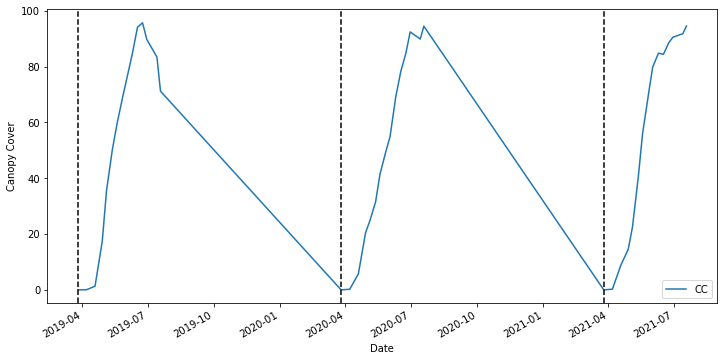

In [300]:
ax = f4.plot(x='Date', y='CC', figsize=(12,6))
xcoords = ['2019-03-26', '2020-03-26', '2021-03-26']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
ax.set_ylabel('Canopy Cover')

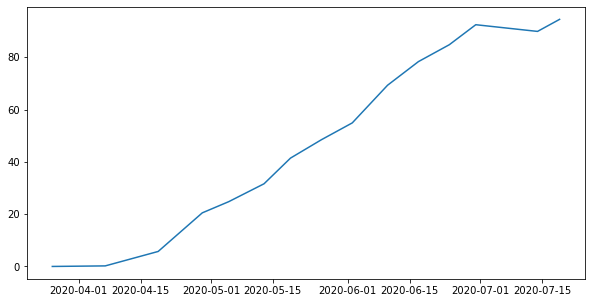

In [301]:
#plt.plot(data2['CC'].loc['2020-04-01':'2020-07-19'])
plt.plot(data2['CC'].loc['2020'])

In [302]:
data2['CC'] = np.log(data2['CC'])
data2['CC_log_diff'] = data2['CC'] - data2['CC'].shift(1)

In [303]:
ad_fuller_result = adfuller(data2['CC_log_diff'].loc['2020'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.5692968457323
p-value: 1.4799827403407619e-06


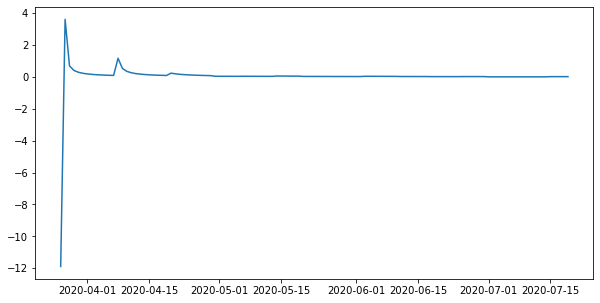

In [304]:
plt.plot(data2['CC_log_diff'].loc['2020'])

In [283]:
check = data2['CC'].loc['2020'].diff(40)
check = check.dropna()

In [284]:
ad_fuller_result = adfuller(check)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.3895783102536536
p-value: 0.5872620840583


In [238]:
data2['CC'].loc['2020-06-01':'2020-06-15']

Date
2020-06-01    3.680000
2020-06-02    3.680000
2020-06-03    4.560000
2020-06-04    5.440000
2020-06-05    6.320000
2020-06-06    7.200000
2020-06-07    7.200000
2020-06-08    7.200000
2020-06-09    7.200000
2020-06-10    7.200000
2020-06-11    6.691429
2020-06-12    6.182857
2020-06-13    5.674286
2020-06-14    5.165714
2020-06-15    5.165714
Name: CC, dtype: float64

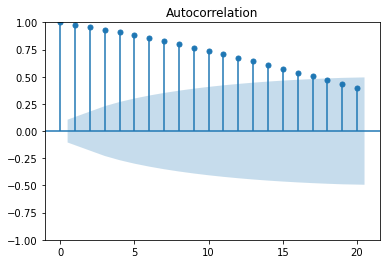

In [173]:
sm.graphics.tsa.plot_acf(f4['CC'].values.squeeze(), lags=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


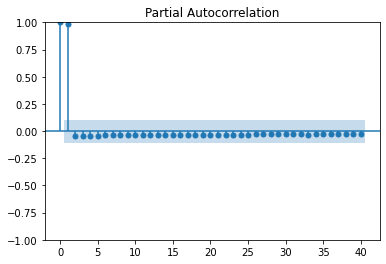

In [174]:
sm.graphics.tsa.plot_pacf(f4['CC'].values.squeeze(), lags=40)
plt.show()

In [175]:
ad_fuller_result = adfuller(f4['CC'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.7417522295489278
p-value: 0.40973892220197944


In [176]:
f4 = f4.dropna()

In [216]:
f4

,Date,CC
0,2019-04-04,NaN
1,2019-04-05,NaN
2,2019-04-06,NaN
3,2019-04-07,NaN
4,2019-04-08,NaN
...,...,...
326,2021-07-15,NaN
327,2021-07-16,NaN
328,2021-07-17,NaN
329,2021-07-18,NaN


In [229]:
# Seasonal differencing
check = f4['CC'].diff(365)
#f4 = f4.drop([1, 2, 3, 4], axis=0).reset_index(drop=True)

In [ ]:
f4

In [230]:
check.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: CC, dtype: float64

In [232]:
check.tail(50)

66    NaN
67    NaN
68    NaN
69    NaN
70    NaN
71    NaN
72    NaN
73    NaN
74    NaN
75    NaN
76    NaN
77    NaN
78    NaN
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
Name: CC, dtype: float64

In [ ]:
ax = f.plot(x='Date', y='CC', figsize=(12,6))
xcoords = ['2019-03-26', '2020-03-26', '2021-03-26']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
ax.set_ylabel('Canopy Cover')

In [178]:
f4 = f4.dropna()

In [179]:
f4

,Date,CC
1,2019-03-31,0.008267
2,2019-04-01,0.008267
3,2019-04-02,0.008267
4,2019-04-03,0.008267
5,2019-04-04,0.008267
...,...,...
331,2021-07-15,0.826571
332,2021-07-16,1.281714
333,2021-07-17,1.736857
334,2021-07-18,2.192000


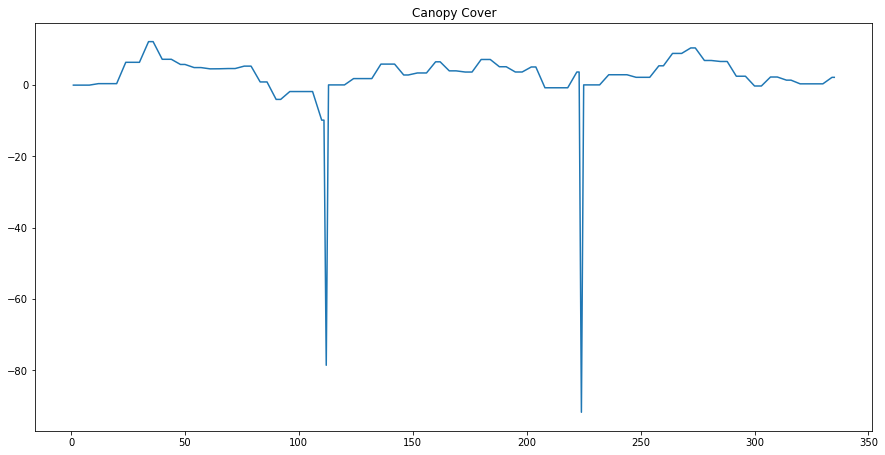

In [180]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(f4['CC'])
plt.title("Canopy Cover")
plt.show()

In [181]:
f4 = f4.dropna()

In [182]:
ad_fuller_result = adfuller(f4['CC'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.9842013917159305
p-value: 2.384766626995825e-05


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


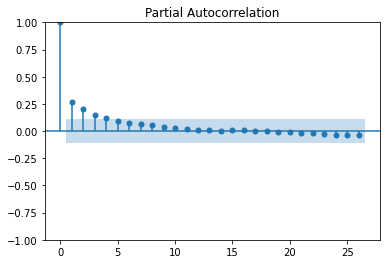

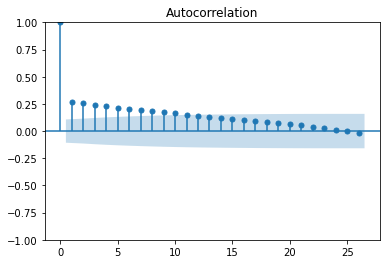

In [183]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(f4['CC']);
plot_acf(f4['CC']);
# p value can be 7 or 8 
# q value can be 3



In [184]:
train_data = f4[:250]
train_data_1 = train_data['CC']
train_data_1

1      0.008267
2      0.008267
3      0.008267
4      0.008267
5      0.008267
         ...   
246    2.560000
247    2.380000
248    2.200000
249    2.200000
250    2.200000
Name: CC, Length: 250, dtype: float64

In [23]:
test_data = f4[250:348]
test_data_1 = test_data['CC']
test_data_1

251    2.200000
252    2.200000
253    2.200000
254    2.200000
255    3.006667
         ...   
331    0.826571
332    1.281714
333    1.736857
334    2.192000
335    2.192000
Name: CC, Length: 85, dtype: float64

In [185]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (7,1,3))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     CC   No. Observations:                  250
Model:                 ARIMA(7, 1, 3)   Log Likelihood                -874.071
Date:                Mon, 01 Aug 2022   AIC                           1770.142
Time:                        14:16:35   BIC                           1808.834
Sample:                             0   HQIC                          1785.716
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0768      0.588     -0.131      0.896      -1.229       1.075
ar.L2          0.9175      0.674      1.361      0.173      -0.403       2.238
ar.L3          0.0107      0.166      0.065      0.9

<AxesSubplot:>

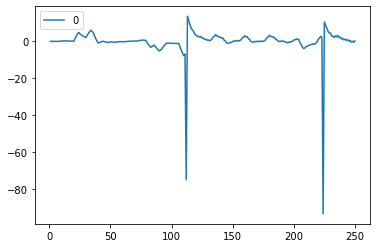

In [186]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

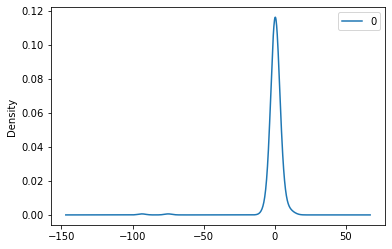

In [187]:
residuals.plot(kind='kde')

In [188]:
residuals.describe()

,0
count,250.000000
mean,-0.022462
std,8.060423
min,-93.434780
25%,-0.445179
50%,0.170548
75%,1.965314
max,13.613350


In [189]:
forecast_1= model_fit.forecast(steps=21, exog=test_data_1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [190]:
predictions=pd.DataFrame(forecast_1)
print (predictions)

     predicted_mean
250        2.616200
251        2.007549
252        2.587645
253        1.985637
254        2.558667
255        1.967229
256        2.538490
257        1.950560
258        2.519501
259        1.935856
260        2.502338
261        1.922918
262        2.486892
263        1.911570
264        2.472960
265        1.901632
266        2.460377
267        1.892948
268        2.448998
269        1.885382
270        2.438691
